# Data loading and processing

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

%matplotlib inline

In [2]:
#Loading train and test data (test set for competition will be called evaluate)
data = pd.read_csv('train.csv', index_col = 'Id')
evaluate = pd.read_csv('test.csv', index_col = 'Id')

In [3]:
#appending both sets to be sure, that made changes whould be the same
full = data.append(evaluate, ignore_index=False, sort = False)

## Features engineering

In [4]:
#creating three typeas of variables: qualitive (only for factorization), 
#ordinal (to change names so that bigger number is better) and quantitive (no need for change)
qualitive = ['MSSubClass', 'MSZoning', 'BldgType', 'Heating',
             'GarageType', 'GarageFinish', 
                 'SaleType', 'SaleCondition',
                'Foundation', 'Fence']

ordinal = ['Street', 'LotShape', 'Basement', 'AfterRemod', 'Utilities', 'LandSlope', 'KitchenQual', 'PavedDrive', 
                'CentralAir', 'PoolQC']
    
quantitive = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'GarageArea', 
             'MiscVal', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
              'Pool_QC_Area', 'Garage_QC_Area', 'LotFrontage']




In [5]:
for i in qualitive:
    full[i] = full[i].factorize()[0]

In [6]:
#creating three typeas of variables: qualitive (only for factorization), 
#ordinal (to change names so that bigger number is better) and quantitive (no need for change)
qualitive = ['MSSubClass', 'MSZoning', 'BldgType', 'Heating',
             'GarageType', 'GarageFinish', 
                 'SaleType', 'SaleCondition',
                'Foundation', 'Fence']

ordinal = ['Street', 'LotShape', 'Utilities', 'LandSlope', 'KitchenQual', 'PavedDrive', 
                'CentralAir', 'PoolQC']
    
quantitive = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'GarageArea', 
             'MiscVal', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
             'LotFrontage']




In [7]:
full['Basement'] = full['BsmtQual'].notnull().map({True: 1, False: 0})

In [8]:
full['AfterRemod'] = full['YearBuilt'].where(full['YearBuilt'] == full['YearRemodAdd']).isna().map({True: 1, False: 0})

In [9]:
full['GarageArea'] = full['GarageArea'].fillna(0)

In [10]:
full['KitchenQual'] = full['KitchenQual'].map({'Fa': 0,
                    'TA': 1, 
                    'Gd': 2, 
                    'Ex': 3})
full['KitchenQual'] = full['KitchenQual'].fillna(0)

In [11]:
full['Street'] = full['Street'].map({'Grvl': 0,
                    'Pave': 1})

In [12]:
full['LotShape'] = full['LotShape'].map({'IR3': 0,
                    'IR2': 1, 
                    'IR1': 2, 
                    'Reg': 3})

In [13]:
full['Utilities'] = full['Utilities'].map({'AllPub': 1,
                    'NoSeWa': 0})
full['Utilities'] = full['Utilities'].fillna(0)

In [14]:
full['LandSlope'] = full['LandSlope'].map({'Sev': 0,
                    'Mod': 1, 
                    'Gtl': 2})

In [15]:
full['PavedDrive'] = full['PavedDrive'].map({'N': 0,
                    'P': 1, 
                    'Y': 2})

In [16]:
full['CentralAir'] = full['CentralAir'].map({'N': 0,
                    'Y': 1})

In [17]:
full['PoolQC'] = full['PoolQC'].map({'Fa': 1,
                    'TA': 2, 
                    'Gd': 3, 
                    'Ex': 4})
full['PoolQC'] = full['PoolQC'].fillna(0)

In [18]:
full['Pool_QC_Area'] = full['PoolQC'] * full['PoolArea']

In [19]:
full['GarageQual'] = full['GarageQual'].map({'Po': 1, 
                    'Fa': 2,
                    'TA': 3, 
                    'Gd': 4, 
                    'Ex': 5})
full['GarageQual'] = full['GarageQual'].fillna(0)

In [20]:
full['Garage_QC_Area'] = full['GarageQual'] * full['GarageArea']

In [21]:
 full['LotFrontage'] = full['LotFrontage'].fillna(0)

## Sets

In [22]:
#joining all needen columns in one DataFrame
full = full[qualitive].join(full[quantitive]).join(full[ordinal]).join(full['SalePrice'])

In [23]:
#division of trainging and evaluate sets
data = full[full['SalePrice'].isna() == False]
evaluate = full[full['SalePrice'].isna() == True].drop(labels = 'SalePrice', axis = 1)

In [24]:
#removing outliers and leverage values
mean = data.describe().loc['mean', 'SalePrice']
std = data.describe().loc['std', 'SalePrice']
data = data[data['SalePrice'] < (mean + 5*std)]

In [25]:
#creating X and y sets
y = data['SalePrice']
X = data.drop(labels = 'SalePrice', axis = 1)

In [26]:
#division of sets for training and scoring
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Decision Tree model learning

In [27]:
#training Decision Tree without limits for hiperparameters
tree = DecisionTreeRegressor(random_state = 1)
tree.fit(X=X_train, y=y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [28]:
#checking a score (low - probably overfitted model)
tree_score = tree.score(X_test, y_test)
tree_score 

0.7104359554084321

In [29]:
#exporting tree to external file for visualisation
export_graphviz(tree, out_file='graph')

# Bagging

In [30]:
#Training Decistion Tree with Bagging
bag = BaggingRegressor(n_estimators=200, n_jobs=4, random_state=1)
bag.fit(X=X_train, y=y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=200, n_jobs=4, oob_score=False, random_state=1,
         verbose=0, warm_start=False)

In [31]:
bag_score = bag.score(X_test, y_test)
bag_score

0.828690513797911

# Boosting

In [32]:
#Training Decistion Tree with Boosting
boost = GradientBoostingRegressor(n_estimators=500)
boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
boost_score = boost.score(X_test, y_test)
boost_score

0.8153933514522544

In [34]:
boost_feature_importances = pd.Series(boost.feature_importances_, X_train.columns).sort_values(ascending=False)
boost_feature_importances

OverallQual      0.597751
LotArea          0.101598
GarageArea       0.086913
KitchenQual      0.050137
LotFrontage      0.031237
YearBuilt        0.025890
OpenPorchSF      0.021975
MSSubClass       0.018593
MSZoning         0.009169
GarageFinish     0.008998
ScreenPorch      0.008184
SaleCondition    0.006025
OverallCond      0.005799
EnclosedPorch    0.005244
SaleType         0.004258
CentralAir       0.003872
LandSlope        0.003415
LotShape         0.002752
PavedDrive       0.001621
Foundation       0.001580
GarageType       0.001046
BldgType         0.000839
MiscVal          0.000657
Fence            0.000638
PoolArea         0.000497
Heating          0.000467
Street           0.000455
Utilities        0.000226
3SsnPorch        0.000156
PoolQC           0.000007
dtype: float64

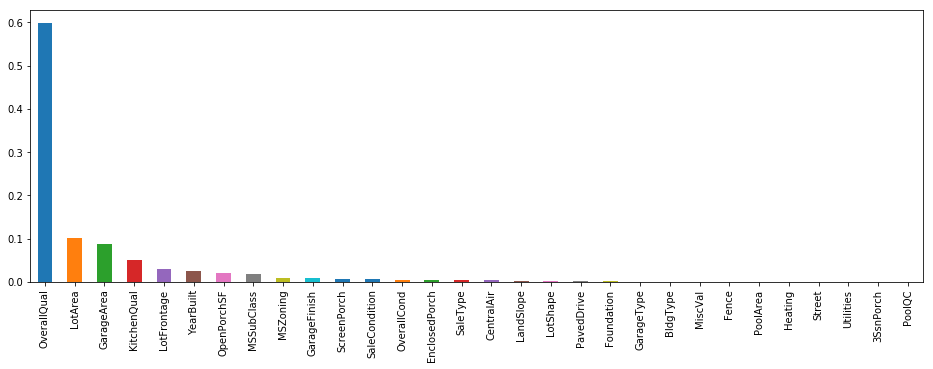

In [35]:
boost_feature_importances.plot(kind = 'bar', figsize=(16, 5))

# Chossing best hiperparameters with GridSearchCV

In [36]:
#using GridSearchCV module to find best hiperparameters for Decision Tree with usage of Cross Validation
estimator = DecisionTreeRegressor(random_state = 1)
param_grid = {'max_depth': range(1, 5),
              'min_samples_leaf': range (1, 10),
             'min_samples_split': range (2, 10)}
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3, n_jobs=4)
grid.fit(X=X, y=y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': range(1, 5), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
#checking the best hiperparameters
best_params = pd.Series(grid.best_params_)
best_params

max_depth            4
min_samples_leaf     6
min_samples_split    2
dtype: int64

In [38]:
#model scoring - much better than tree without limits
grid_score = grid.score(X=X_test, y=y_test)
grid_score

0.7911958421425753

# Random forest training

In [39]:
#Random Forest training using the best hiperparameters
sqrt = int(np.sqrt(len(X_train.columns)))
forest = RandomForestRegressor(max_depth=best_params['max_depth'],
                              min_samples_leaf = best_params['min_samples_leaf'],
                              min_samples_split = best_params['min_samples_split'], n_estimators=100, random_state = 1,
                              bootstrap=True, max_features=sqrt, n_jobs=4)
forest.fit(X=X_train, y=y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=6,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=4, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [40]:
forest_score = forest.score(X=X_test, y=y_test)
forest_score

0.7585399714185186

In [41]:
#checking importance of used variables
feature_importances = pd.Series(forest.feature_importances_, X_train.columns).sort_values(ascending=False)
feature_importances

OverallQual      0.292572
GarageArea       0.146777
KitchenQual      0.111692
YearBuilt        0.110167
LotArea          0.067606
OpenPorchSF      0.060891
Foundation       0.049920
MSSubClass       0.036577
GarageFinish     0.030767
LotFrontage      0.026425
SaleCondition    0.012312
MSZoning         0.011276
LotShape         0.009459
GarageType       0.007425
SaleType         0.006952
OverallCond      0.006053
CentralAir       0.003013
ScreenPorch      0.002826
BldgType         0.001764
PavedDrive       0.001728
LandSlope        0.001367
EnclosedPorch    0.001304
Fence            0.000948
MiscVal          0.000110
Heating          0.000070
PoolArea         0.000000
Utilities        0.000000
Street           0.000000
3SsnPorch        0.000000
PoolQC           0.000000
dtype: float64

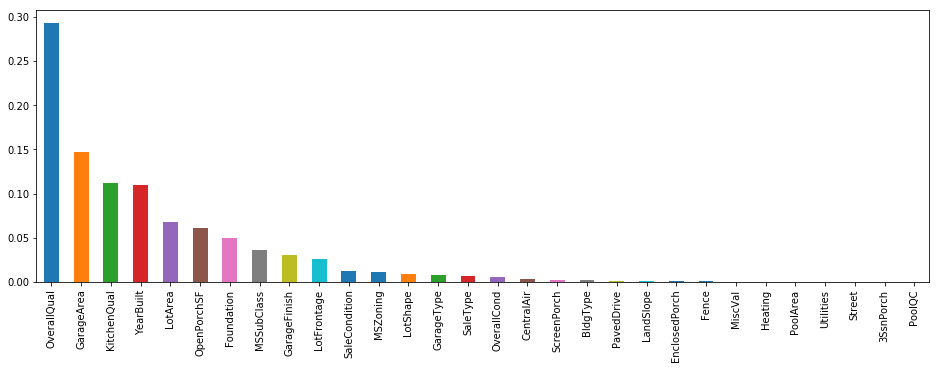

In [42]:
feature_importances.plot(kind = 'bar', figsize=(16, 5))

## Least square regression

In [43]:
#preparing datasets for Linear Regression (only ordinal and quantitive data)
X_train_lin = X_train[quantitive].join(X_train[ordinal])
X_test_lin = X_test[quantitive].join(X_test[ordinal])

In [44]:
#Linear Regression using Least Square Method
square = LinearRegression(fit_intercept=True, copy_X=True, n_jobs = 4, normalize = True)
square.fit(X_train_lin,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=True)

In [45]:
square_score = square.score(X_test_lin,y_test)
square_score

0.7895445938997423

In [46]:
#checking coefficients
square.intercept_

-570605.8161979582

In [47]:
#coefficients of the model
pd.Series(square.coef_, X_train_lin.columns)

LotArea              1.056821
OverallQual      26225.355736
OverallCond       2058.691159
YearBuilt          204.568570
GarageArea          71.758909
MiscVal              0.867624
OpenPorchSF         56.142118
EnclosedPorch       24.095527
3SsnPorch           -2.020348
ScreenPorch         86.308000
PoolArea           109.809396
LotFrontage         80.841785
Street           46959.980307
LotShape         -7282.648451
Utilities        76855.459593
LandSlope        -6195.920567
KitchenQual      19033.625725
PavedDrive        1870.616380
CentralAir       -3554.809849
PoolQC          -41820.649007
dtype: float64

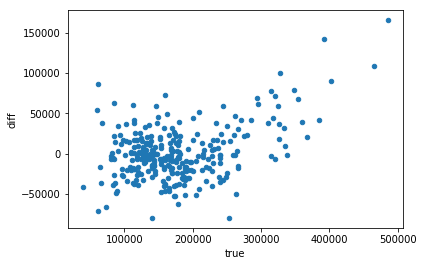

In [48]:
#creating a graph with residual values
prediction = square.predict(X = X_test_lin)
compare = pd.DataFrame({'prediction': prediction, 'true': y_test, 'diff': (y_test - prediction)})
compare.plot.scatter( x = 'true', y = 'diff')

# Ridge Regression

In [49]:
#Linear Regression using Ridge Method
ridge = Ridge(fit_intercept=True, random_state=1, alpha=1, normalize=True)
ridge.fit(X_train_lin,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=1, solver='auto', tol=0.001)

In [50]:
ridge_score = ridge.score(X = X_test_lin, y = y_test)
ridge_score

0.7237476247802168

In [51]:
ridge.intercept_

-512824.80133683444

In [52]:
#coefficients of the model
pd.Series(ridge.coef_, X_train_lin.columns)

LotArea              0.623767
OverallQual      13230.709915
OverallCond        182.873691
YearBuilt          250.946561
GarageArea          54.760527
MiscVal              0.291539
OpenPorchSF         73.682942
EnclosedPorch       -1.472365
3SsnPorch            5.162104
ScreenPorch         58.626560
PoolArea            -4.100203
LotFrontage         90.490968
Street           27732.262031
LotShape         -7447.175363
Utilities        35000.257180
LandSlope        -5874.976816
KitchenQual      18125.183432
PavedDrive        3757.014516
CentralAir        8537.264793
PoolQC           -5122.046899
dtype: float64

## Lasso Regression

In [53]:
#Linear Regression using Lasso Method
lasso = Lasso(fit_intercept=True, copy_X=True, random_state=1, max_iter=20000, alpha=4, normalize=True)
lasso.fit(X=X_train_lin, y=y_train)

Lasso(alpha=4, copy_X=True, fit_intercept=True, max_iter=20000,
   normalize=True, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
lasso_score = lasso.score(X=X_test_lin, y=y_test)
lasso_score

0.7899315142141495

In [55]:
lasso.intercept_

-532317.2486722034

In [56]:
#coefficients of the model
pd.Series(lasso.coef_, X_train_lin.columns)

LotArea              1.049751
OverallQual      26267.370741
OverallCond       1775.407618
YearBuilt          188.761198
GarageArea          71.429731
MiscVal              0.672140
OpenPorchSF         54.719126
EnclosedPorch       17.976136
3SsnPorch           -0.000000
ScreenPorch         84.204865
PoolArea            77.988478
LotFrontage         75.058146
Street           44254.944915
LotShape         -7138.866072
Utilities        72199.484219
LandSlope        -5681.262914
KitchenQual      19130.229734
PavedDrive        1573.814451
CentralAir       -2069.797619
PoolQC          -34615.591734
dtype: float64

## DummyRegressor

In [57]:
#comparing obtained scores with score from Dummy Regressor
dummy = DummyRegressor(strategy='mean')
dummy.fit(X=X_train, y=y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [58]:
dummy.score(X = X_test, y=y_test)

-0.0027327000850954075

## Predictions for test data

In [59]:
#collecting scores of all created models
scores = pd.Series({'tree': tree_score,
'grid': grid_score,
'forest': forest_score,
'square': square_score,
'lasso': lasso_score,
'ridge': ridge_score,
'bag': bag_score,
'boost': boost_score})
scores.sort_values(ascending = False)

bag       0.828691
boost     0.815393
grid      0.791196
lasso     0.789932
square    0.789545
forest    0.758540
ridge     0.723748
tree      0.710436
dtype: float64

In [60]:
scores.idxmax()

'bag'

In [61]:
#creating file for submission using model with the best score
predict = bag.predict(X = evaluate)

In [62]:
results = pd.DataFrame({'Id': evaluate.index,
                        'SalePrice': predict})

In [63]:
results = results.set_index(keys = 'Id')

In [64]:
results.to_csv('submission.csv')